# **Data Preprocessing**



------





**1. Load dataset adult.csv dan buang feature yang tidak dibutuhkan serta rapikan dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dirt = pd.read_csv('/content/drive/My Drive/adult.csv')
dirt

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
dirt.replace('?',np.NaN,inplace=True)
dirt.dropna(axis=0,inplace=True)
print(dirt.shape)

(45222, 15)


In [ ]:
dirt

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df = dirt.drop(['education','fnlwgt','educational-num'],axis=1)
df.head()

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
df['capital-loss'].value_counts()

0       43082
1902      294
1977      246
1887      228
2415       68
        ...  
419         1
155         1
1539        1
2201        1
1421        1
Name: capital-loss, Length: 97, dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   marital-status  45222 non-null  object
 3   occupation      45222 non-null  object
 4   relationship    45222 non-null  object
 5   race            45222 non-null  object
 6   gender          45222 non-null  object
 7   capital-gain    45222 non-null  int64 
 8   capital-loss    45222 non-null  int64 
 9   hours-per-week  45222 non-null  int64 
 10  native-country  45222 non-null  object
 11  income          45222 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


**2. Batasi dataset hanya pada data yang memiliki umur 25 - 40 tahun**

In [ ]:
df = df[(df['age']>=25)&(df['age']<=40)]
df.head(10)

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
5,34,Private,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
11,36,Federal-gov,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
12,26,Private,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,<=50K
18,37,Private,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
20,34,Private,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
21,34,Private,Never-married,Other-service,Own-child,Black,Female,0,0,35,United-States,<=50K
23,25,Private,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K


**3. Cek tipe data pada masing-masing feature dan encoding bila diperlukan**

In [ ]:
# Cek tipe data

int_column = df.select_dtypes('int64').columns
df.dtypes

age                int64
workclass         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
# Encoding
encode = df.copy()
le = LabelEncoder()
encode['workclass'] = le.fit_transform(encode['workclass'])
encode['marital-status'] = le.fit_transform(encode['marital-status'])
encode['occupation'] = le.fit_transform(encode['occupation'])
encode['relationship'] = le.fit_transform(encode['relationship'])
encode['race'] = le.fit_transform(encode['race'])
encode['gender'] = le.fit_transform(encode['gender'])
encode['native-country'] = le.fit_transform(encode['native-country'])
encode['income'] = le.fit_transform(encode['income'])

encode.head(10)

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,4,6,3,2,1,0,0,40,38,0
1,38,2,2,4,0,4,1,0,0,50,38,0
2,28,1,2,10,0,4,1,0,0,40,38,1
5,34,2,4,7,1,4,1,0,0,30,38,0
11,36,0,2,0,0,4,1,0,0,40,38,0
12,26,2,4,0,1,4,0,0,0,39,38,0
18,37,2,6,6,4,4,0,0,0,20,38,0
20,34,2,2,12,0,4,1,0,0,47,38,1
21,34,2,4,7,3,2,0,0,0,35,38,0
23,25,2,4,9,1,4,1,0,0,43,28,0


**4. Cek data null dan data duplicated**

In [ ]:
encode.isnull().sum()

age               0
workclass         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
print('Data Duplikasi: ',encode.duplicated().sum())

Data Duplikasi:  5173


**5. Handling miss value dan handling duplicated data jika diperlukan**

In [ ]:
#menghapus entri yang memiliki data duplikat 
encode.drop_duplicates(inplace=True)
print('Data Duplikasi: ',encode.duplicated().sum()) # no more duplicates
print(encode.shape) # re-check by printing data size

Data Duplikasi:  0
(14070, 12)


**6. Cek data outlier dengan visualisasikan dalam boxplot pada masing-masing feature**

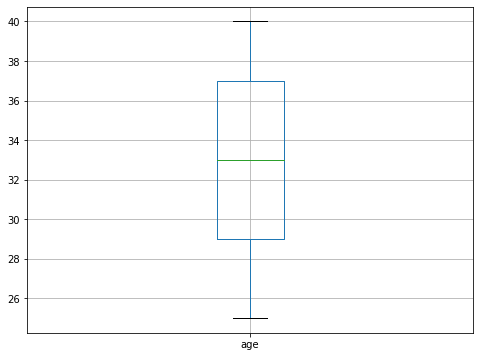

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='age')
plt.show()

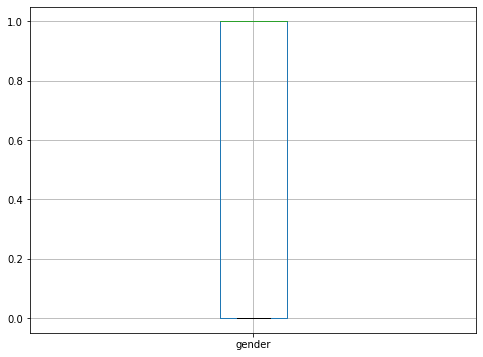

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='gender')
plt.show()

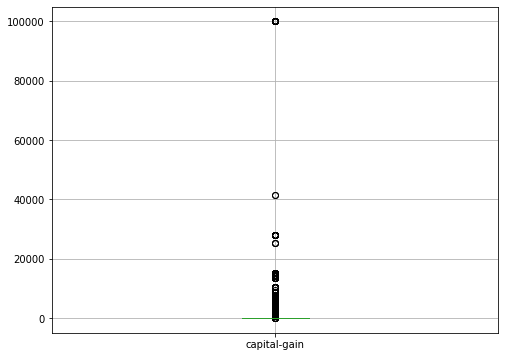

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='capital-gain')
plt.show()

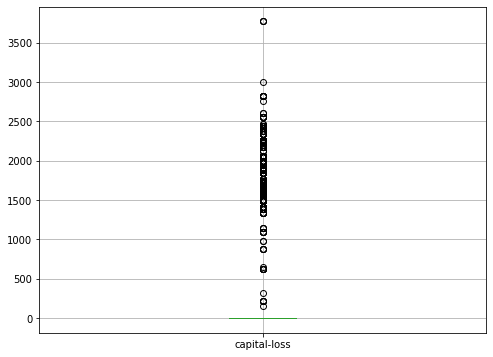

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='capital-loss')
plt.show()

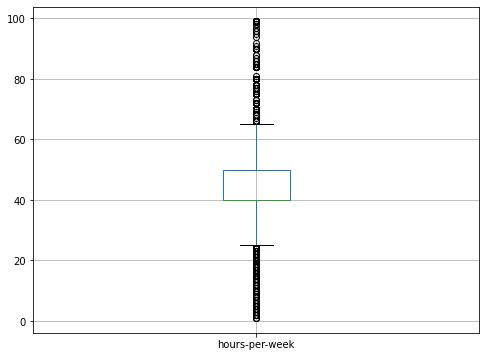

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='hours-per-week')
plt.show()

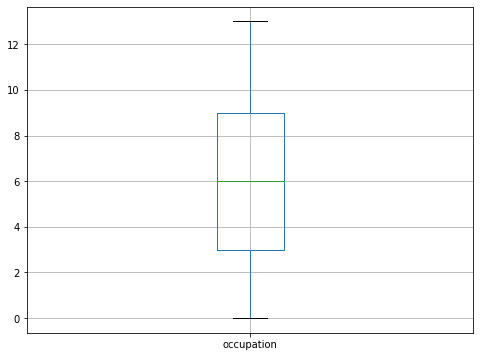

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='occupation')
plt.show()

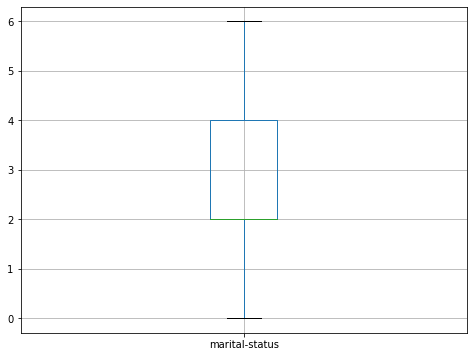

In [ ]:
plt.figure(figsize=(8,6))
encode.boxplot(column='marital-status')
plt.show()

**7. Handling outlier jika diperlukan**

In [ ]:
outlier_df = encode.copy()

In [ ]:
outlier_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10425.0,32.645084,4.515820,25.0,29.0,33.0,36.0,40.0
workclass,10425.0,2.165372,1.007974,0.0,2.0,2.0,2.0,6.0
marital-status,10425.0,2.606906,1.499012,0.0,2.0,2.0,4.0,6.0
occupation,10425.0,5.981966,4.058199,0.0,2.0,6.0,9.0,13.0
relationship,10425.0,1.597794,1.647650,0.0,0.0,1.0,3.0,5.0
race,10425.0,3.515300,0.991996,0.0,4.0,4.0,4.0,4.0
gender,10425.0,0.653717,0.475808,0.0,0.0,1.0,1.0,1.0
capital-gain,10425.0,1001.876259,6057.784034,0.0,0.0,0.0,0.0,99999.0
capital-loss,10425.0,118.594341,459.511867,0.0,0.0,0.0,0.0,3770.0
hours-per-week,10425.0,41.934293,4.334821,33.0,40.0,40.0,45.0,52.0


In [ ]:
# Quartile
Q1 = outlier_df['hours-per-week'].quantile(0.25)
Q3 = outlier_df['hours-per-week'].quantile(0.75)

Q1,Q3

(40.0, 45.0)

In [ ]:
IQR = Q3-Q1
IQR

5.0

In [ ]:
lowwer_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lowwer_limit,upper_limit

(32.5, 52.5)

In [ ]:
outlier_df = outlier_df[(outlier_df['hours-per-week'] > lowwer_limit) & (outlier_df['hours-per-week'] < upper_limit)]
outlier_df

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,4,6,3,2,1,0,0,40,38,0
1,38,2,2,4,0,4,1,0,0,50,38,0
2,28,1,2,10,0,4,1,0,0,40,38,1
11,36,0,2,0,0,4,1,0,0,40,38,0
12,26,2,4,0,1,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48818,30,2,4,2,1,2,1,0,0,46,38,0
48819,38,2,0,9,4,2,0,15020,0,45,38,1
48827,37,2,0,12,1,4,0,0,0,40,38,0
48832,32,2,2,5,0,0,1,0,0,40,38,0


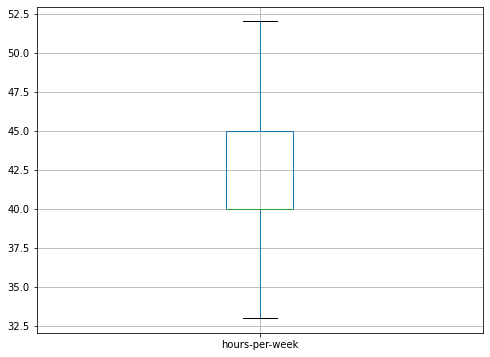

In [ ]:
# Cek
plt.figure(figsize=(8,6))
outlier_df.boxplot(column='hours-per-week')
plt.show()

**8. Normalisasikan data menggunakan normalisasi minmax**

In [ ]:
normalize = outlier_df.copy()
normalize[int_column] = MinMaxScaler().fit_transform(normalize[int_column])
normalize.head(8)

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,2,4,6,3,2,1,0.0,0.0,0.368421,38,0
1,0.866667,2,2,4,0,4,1,0.0,0.0,0.894737,38,0
2,0.200000,1,2,10,0,4,1,0.0,0.0,0.368421,38,1
11,0.733333,0,2,0,0,4,1,0.0,0.0,0.368421,38,0
12,0.066667,2,4,0,1,4,0,0.0,0.0,0.315789,38,0
20,0.600000,2,2,12,0,4,1,0.0,0.0,0.736842,38,1
21,0.600000,2,4,7,3,2,0,0.0,0.0,0.105263,38,0
23,0.000000,2,4,9,1,4,1,0.0,0.0,0.526316,28,0


In [ ]:
dt = normalize.reset_index(drop=True)
dt

,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.000000,2,4,6,3,2,1,0.000000,0.0,0.368421,38,0
1,0.866667,2,2,4,0,4,1,0.000000,0.0,0.894737,38,0
2,0.200000,1,2,10,0,4,1,0.000000,0.0,0.368421,38,1
3,0.733333,0,2,0,0,4,1,0.000000,0.0,0.368421,38,0
4,0.066667,2,4,0,1,4,0,0.000000,0.0,0.315789,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10420,0.333333,2,4,2,1,2,1,0.000000,0.0,0.684211,38,0
10421,0.866667,2,0,9,4,2,0,0.150202,0.0,0.631579,38,1
10422,0.800000,2,0,12,1,4,0,0.000000,0.0,0.368421,38,0
10423,0.466667,2,2,5,0,0,1,0.000000,0.0,0.368421,38,0


# **Modelling**

**9. Lakukan modelling dengan data test size 20%, 25% dan 30% serta tampilkan hasil skor akurasi**

**Test Size 20%**

In [ ]:
X = dt.values[:, 0:11]
Y = dt.values[:, 11]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

# Naive Bayes Classifier
GNB = GaussianNB()

GNB.fit(X_train,Y_train)
print("Data Test 20% Score Accuracy = {:2%} \n".format(GNB.score(X_test,Y_test)))

Data Test 20% Score Accuracy = 80.479616% 



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

# Naive Bayes Classifier
GNB = GaussianNB()

GNB.fit(X_train,Y_train)
print("Data Test 25% Score Accuracy = {:2%} \n".format(GNB.score(X_test,Y_test)))

Data Test 25% Score Accuracy = 80.475643% 



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

# Naive Bayes Classifier
GNB = GaussianNB()

GNB.fit(X_train,Y_train)
print("Data Test 30% Score Accuracy = {:2%} \n".format(GNB.score(X_test,Y_test)))

Data Test 30% Score Accuracy = 80.498721% 

